In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def GP(data, k, ln_ls):
    inds = np.arange(len(data) + 1 - k)[:, None] + np.arange(k)
    omegas = data[inds]
    ros = np.linalg.norm(omegas[:, None] - omegas, axis=2)
    tmp = (ros[None] - np.exp(ln_ls)[:, None, None] < 0) 
    return np.log(tmp.mean(axis=(1, 2)))

In [31]:
def get_ts(T, N):
	return np.array(np.sin(np.linspace(0, T, N+1)))

T = 1.0
N = 1000
data = get_ts(T, N)

# будем рассматривать логарифмы
# а в GP берем экспоненты
ln_ls = np.arange(-10, 2, 0.1)
ks = range(1, 8)  

ln_Cs = {}
for i in ks:
    ln_Cs[i] = GP(data, i, ln_ls)

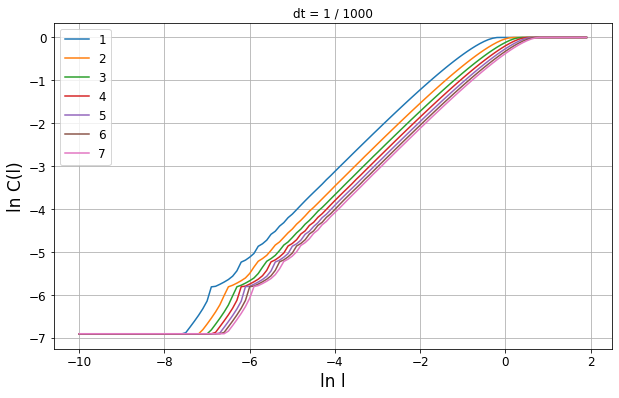

In [32]:
plt.figure(figsize=(10, 6))
fontsize = 12
for i in ks:
    plt.plot(ln_ls, ln_Cs[i], label=i)

plt.title('dt = 1 / 1000')
plt.xlabel('ln l', fontsize=fontsize+5)
plt.ylabel('ln C(l)', fontsize=fontsize+5)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.grid()
plt.show()

In [33]:
T = np.pi
N = 1000
data = get_ts(T, N)

ln_ls = np.arange(-10, 2, 0.1)
ks = range(1, 8)  

ln_Cs = {}
for i in ks:
    ln_Cs[i] = GP(data, i, ln_ls)

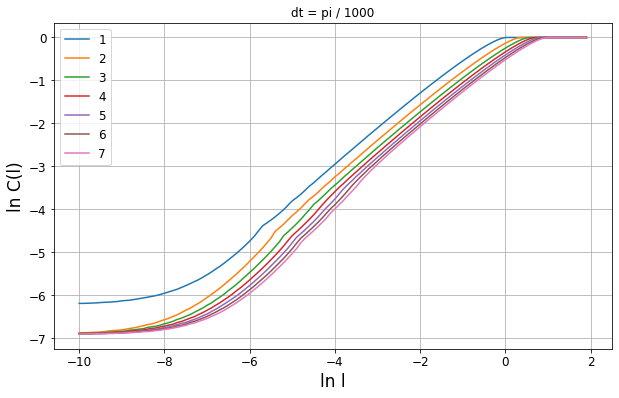

In [34]:
plt.figure(figsize=(10, 6))
fontsize = 12
for i in ks:
    plt.plot(ln_ls, ln_Cs[i], label=i)

plt.title('dt = pi / 1000')
plt.xlabel('ln l', fontsize=fontsize+5)
plt.ylabel('ln C(l)', fontsize=fontsize+5)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.grid()
plt.show()

# получается по двум точкам можно уже сказать какая будет след. точка
# tg alpha начиная со второго перестал меняться